<a href="https://colab.research.google.com/github/Devyani273/Regression---Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##**Project Type**    - Regression
##**Contribution**    - Individual


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. The given dataset contains the monthly stock prices of the ***Yes bank*** and includes closing, starting, highest, lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

Our initial steps will include data exploring(understanding the dataset) and data wrangling after loading the dataset.Then we'll perform EDA. After EDA we'll scale and split the data and implement ML Models.

Given dataset has 185 rows and five columns(Date, Open, High, Low, Close).While checking for null and duplicate values, we found out that it doesn't have any null values nor any duplicate values. Then we converted the datatype of 'Date' column to datetime which was object initially.

Then we've performed EDA(Exploratory Data Analysis) to understand the distribution of all the variables which were found to be right skewed and hence we performed log transformation to make it close to normal. We checked the relationship between dependent and independent variables using a scatter plot which shows that dependent and independent variables were highly correlated. Infact independent variables were highly correlated with each other also causing multicollinearity.

After EDA we did ML Model Implementation after scaling and splitting the data into 80:20 ratio i.e., 80% of data used as train set and 20% as test set. We have implemented total 5 Regression models(Linear Regression , Lasso Regression, Ridge Regression ,Elastic Net Regression and XG Boost Regression ).
We checked every ML model's performance using Evaluation metrics.Evaluation metrics are used to measure the quality of the statistical or machine learning model. We've also performed Cross Validation on models to test the effectiveness of machine learning(ML) models.

We found XGBoost Regression to be the best model among all the five models as it scores the best in every single metric.


# **GitHub Link -**

https://github.com/Devyani273/Regression---Yes-Bank-Stock-Closing-Price-Prediction.git

# **Problem Statement**


**YES Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations.The main objective is to predict the stock’s closing price of the month.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Regression - Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'
data = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(data.shape)
print(f'No. of rows in the dataset - {data.shape[0]}')
print(f'No. of columns in the dataset - {data.shape[1]}')


(185, 5)
No. of rows in the dataset - 185
No. of columns in the dataset - 5


### Dataset Information

In [ ]:
# Basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


We can infer that:

* There are no null values
* Date column is in the form of object, it needs to be converted into datetime

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

Dataset doesn't have duplicate values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

As we've seen above,there are no null values in the dataset

### What did you know about your dataset?

* Dataset has 185 rows and 5 columns
* Dataset does not have null values
* There are no duplicate values in the dataset
* Date column is of object type, we have to convert it into datetime.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# datatype of columns
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
# Dataset Describe
# statistical summary of the dataset
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


### Variables Description 

###Explaining the variables present :-

*  **Date :-** denotes the date (so we can see the price at a given date.).
*  **Open :-** denotes the price at which a stock started trading.
*  **High :-**highest price at which a stock traded during a period.
*  **Low :-**the minimum price at which a stock traded during a period.
*  **Close :-** the closing price refers to a stock's trading price closed at the end. 
The closing price is the 
price of the stock at the end of the month or the time period in consideration.(**target variable**)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# making a copy of original dataset
df = data.copy()

In [ ]:
# Write your code to make your dataset analysis ready.
df['Date'].sample(3)

2      Sep-05
87     Oct-12
101    Dec-13
Name: Date, dtype: object

In [ ]:
# converting Date column from object to datetime datatype

df['Date'] = df.Date.apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
df.Date.sample(3)

133   2016-08-01
116   2015-03-01
46    2009-05-01
Name: Date, dtype: datetime64[ns]

### What all manipulations have you done and insights you found?



* Converted datatype of Date column to Datetime in "YYYY-MM-DD" format.

* Data doesn't have null values and duplicate values so there wasn't much data wrangling needed.

* There is no categorical data present in the dataset.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Closing price Vs Date')

<Figure size 2000x600 with 0 Axes>

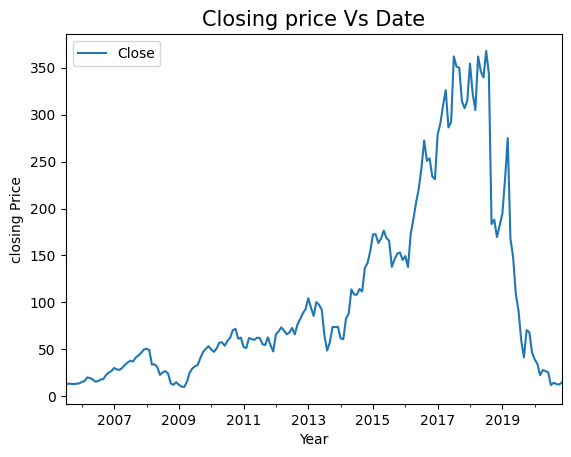

In [ ]:
# plotting how the dependent variable varies with the Date. 
fig = plt.figure(figsize=(20,6))
df.plot(x='Date',y = 'Close',kind = 'line')
plt.xlabel('Year')
plt.ylabel('closing Price')
plt.title('Closing price Vs Date',fontsize = 15)

What is/are the insight(s) found from the chart?

The Yes Bank closing stock prices were going up till 2018, after 2018 it is on a downward trend

#### Chart - 2


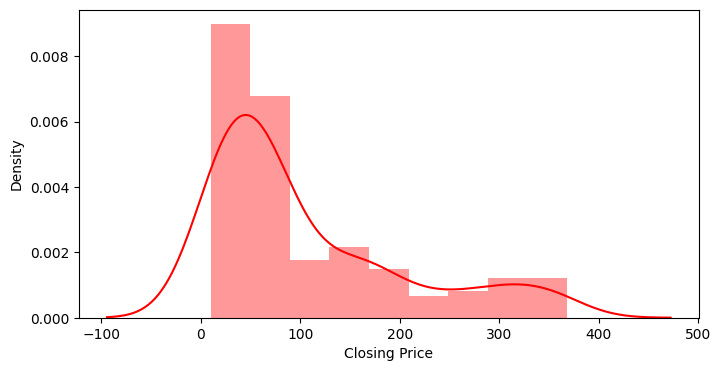

In [ ]:
# Dependent variable 'Closing price'
plt.figure(figsize=(8,4))
var = df['Close']
sns.distplot(var,color ='r')
plt.xlabel('Closing Price')
plt.show()

#####  What is/are the insight(s) found from the chart?

It's clearly visible the data is right skewed hence log transformation is needed to make the distribution normal

**The log transformation is used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.**

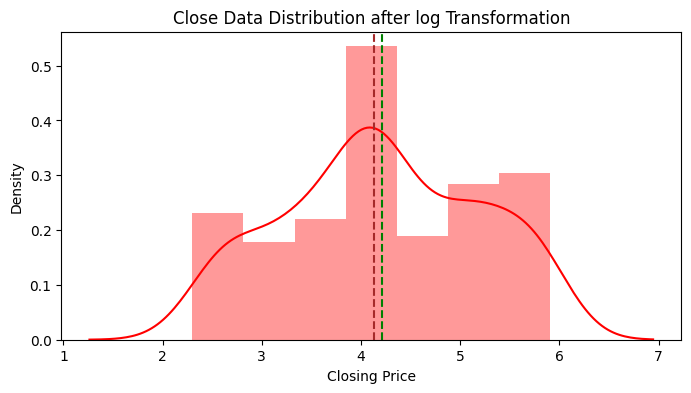

In [ ]:
#Applying log transformation on dependent variable 
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
var = np.log(df['Close'])
sns.distplot(var,color="r")
ax.axvline(var.mean(),color='green',linewidth=1.5,linestyle = 'dashed')
ax.axvline(var.median(),color='brown',linestyle='dashed',linewidth=1.5) 
plt.title('Close Data Distribution after log Transformation')
plt.xlabel('Closing Price')
plt.show()


Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.

#### Chart - 3

In [ ]:
# putting numerical columns together in a variable called "numeric_cols"

numeric_vars = df.describe().columns
numeric_vars

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

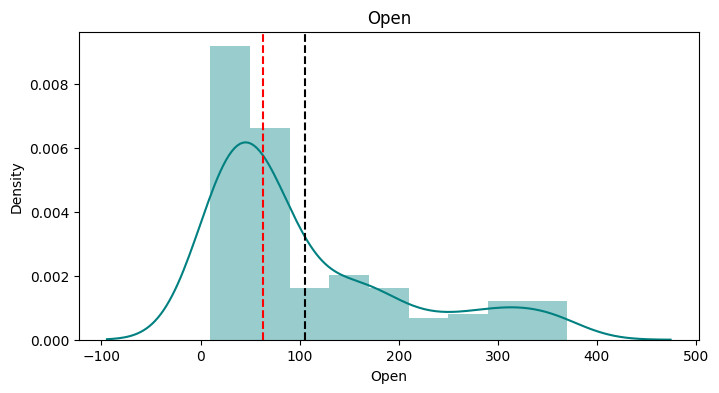

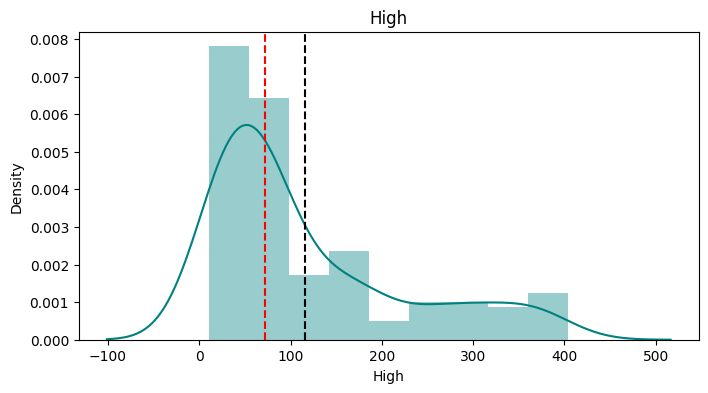

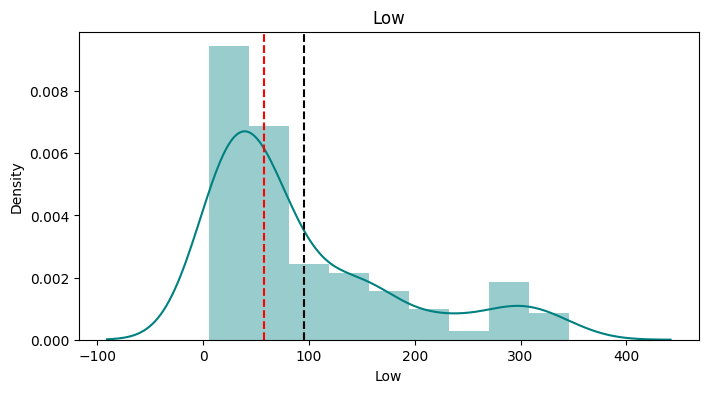

In [ ]:
# Checking the distribution and Mean, Median of the independent variables.

for var in numeric_vars[:-1]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    variables = df[var]
    sns.distplot(variables, color='teal')
    # variables.distplot(bins=50, ax = ax)
    ax.axvline(variables.mean(),color='black',linewidth=1.5,linestyle = 'dashed')
    ax.axvline(variables.median(),color='red',linestyle='dashed',linewidth=1.5)    
    ax.set_title(var)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

It's clearly visible that these distributions are positively skewed. It suggests that independent variables are not normally distributed.

Therefore we will have to use log transformation to reduce the skewness and convert it to the distribution i.e close to normal.



#### Chart - 4

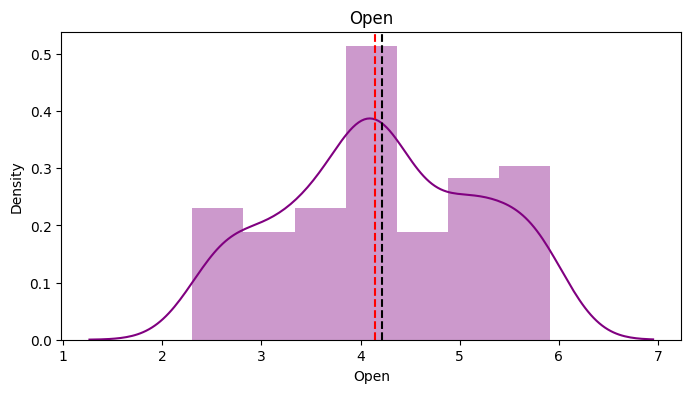

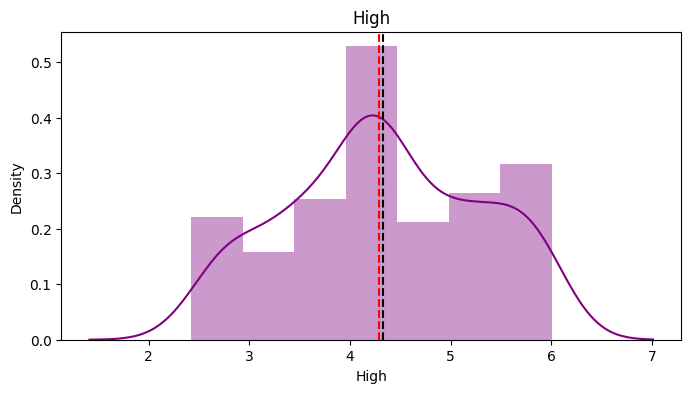

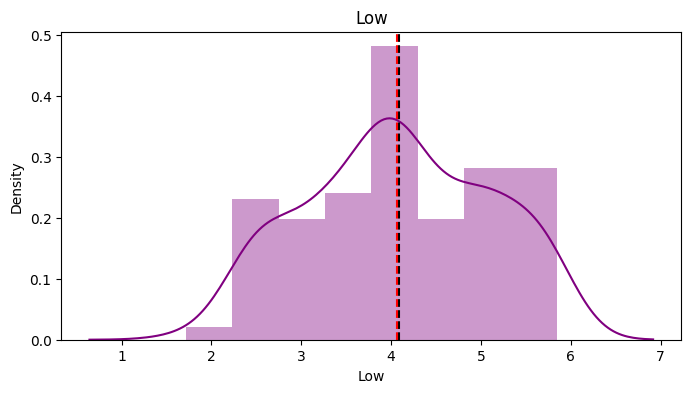

In [ ]:
# applying log transformation
# Checking the distribution and Mean, Median of the independent variables after log transformation

for var in numeric_vars[:-1]:
  fig = plt.figure(figsize=(8,4))
  ax = fig.gca()
  variables = np.log(df[var])
  sns.distplot(variables, color='purple')
  ax.axvline(variables.mean(), color='black', linestyle='dashed', linewidth=1.5)
  ax.axvline(variables.median(), color='red', linestyle='dashed', linewidth=1.5)    
  ax.set_title(var)
plt.show()

##### 2. What is/are the insight(s) found from the chart?


After applying log transformation, we can see the means and medians are close to each other and the distribution is very close to normal distribution.



#### Chart - 5

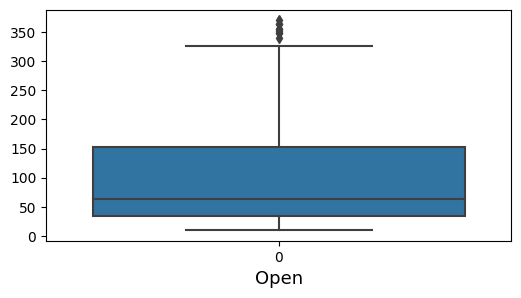

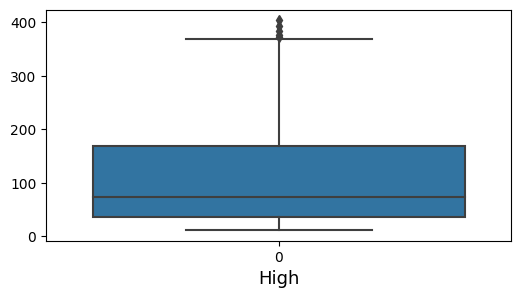

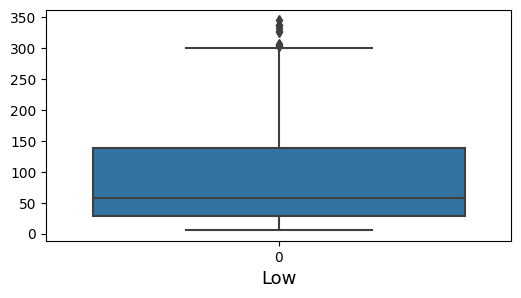

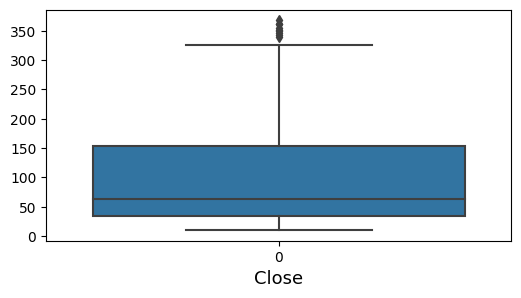

In [ ]:
# Let's check for outliers in the data.

for var in numeric_vars:
  plt.rcParams['figure.figsize'] = (6,3)
  sns.boxplot(df[var])
  plt.xlabel(var, fontsize=13)
  plt.show()

We can see there are some outliers, we'll have to deal with them.

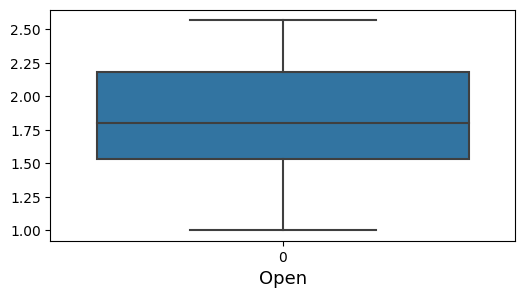

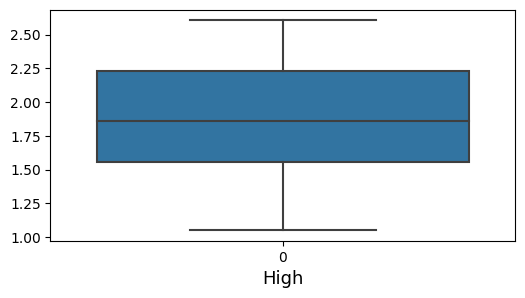

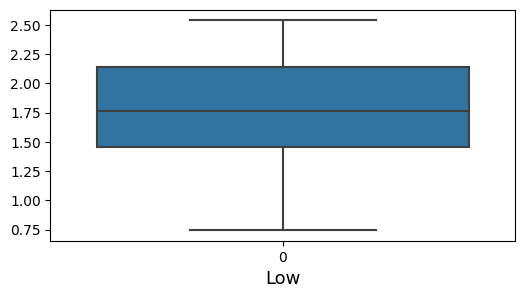

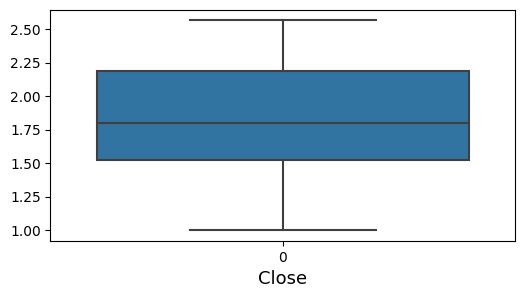

In [ ]:
# Let's check for outliers now in the transformed variable data.

for var in numeric_vars:
  plt.figure(figsize=(6,3))
  sns.boxplot(np.log10(df[var]))
  plt.xlabel(var, fontsize=13)
  plt.show()


#####  What is/are the insight(s) found from the chart?

Log transformation also de-emphasizes outliers so we don't have outliers in our data as such.


**Bivariate Analysis**

#### Chart - 6

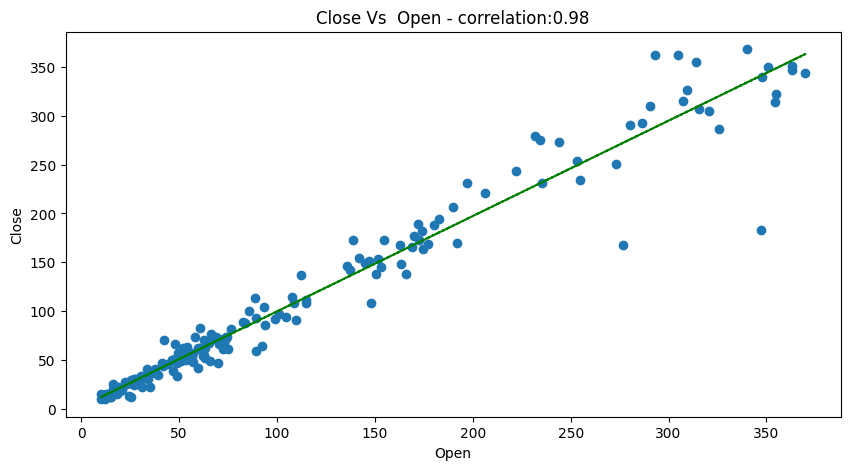

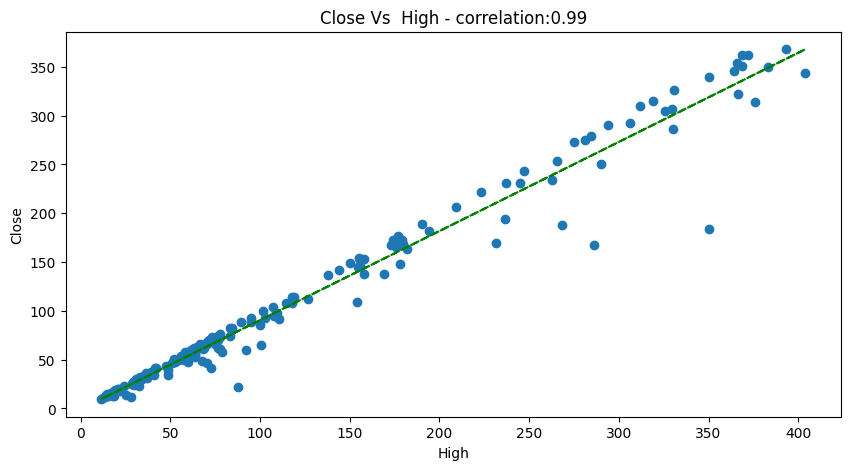

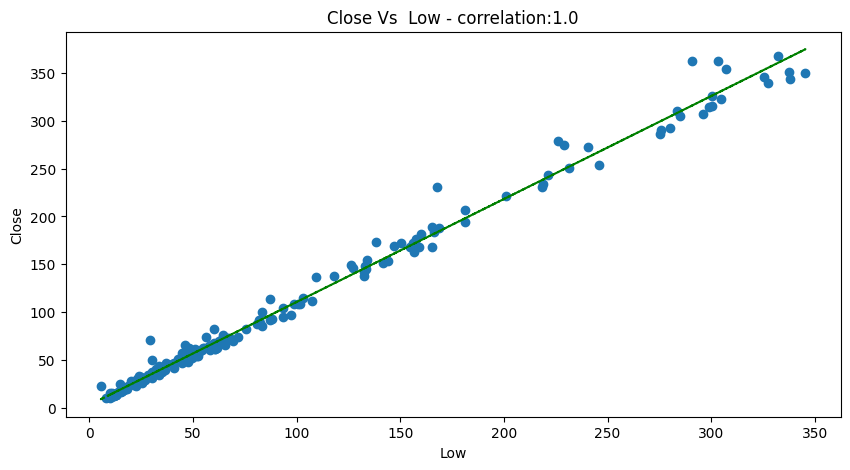

In [ ]:
# Chart - 6 visualization code
# plotting the scatter plot to see the relationship between dependent and independent variables

for var in numeric_vars[:-1]:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  variables = df[var]
  label = df['Close']
  correlation = variables.corr(label)
  plt.scatter(x = variables,y = label)
  plt.xlabel(var)
  plt.ylabel('Close')
  plt.title('Close Vs  ' + var + ' - correlation:' + str(round(correlation,2)))
  z = np.polyfit(df[var],df['Close'],1)
  y_hat = np.poly1d(z)(df[var])
  plt.plot(df[var] , y_hat, "g--",lw = 1.5)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From the plot above, it's clear that all the independent variables are highly correlated with the dependent variable.

The relationship between dependent and independent variables is linear in nature.

#### Chart - 7 - Correlation Heatmap

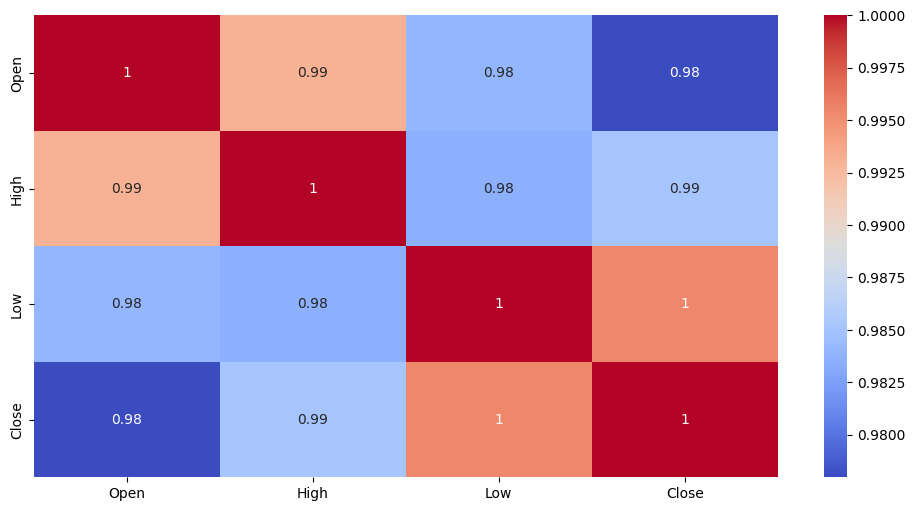

In [ ]:
#Checking Correlation using heatmap for all the variables
plt.figure(figsize=(12,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True,cmap = 'coolwarm')
plt.show()

##### What is/are the insight(s) found from the chart?

As we can see above independent variables are highly correlated with dependent variable but independent variables are highly correlated with each other also which results in Multicollinearity.


#### Chart - 8 - Pair Plot 

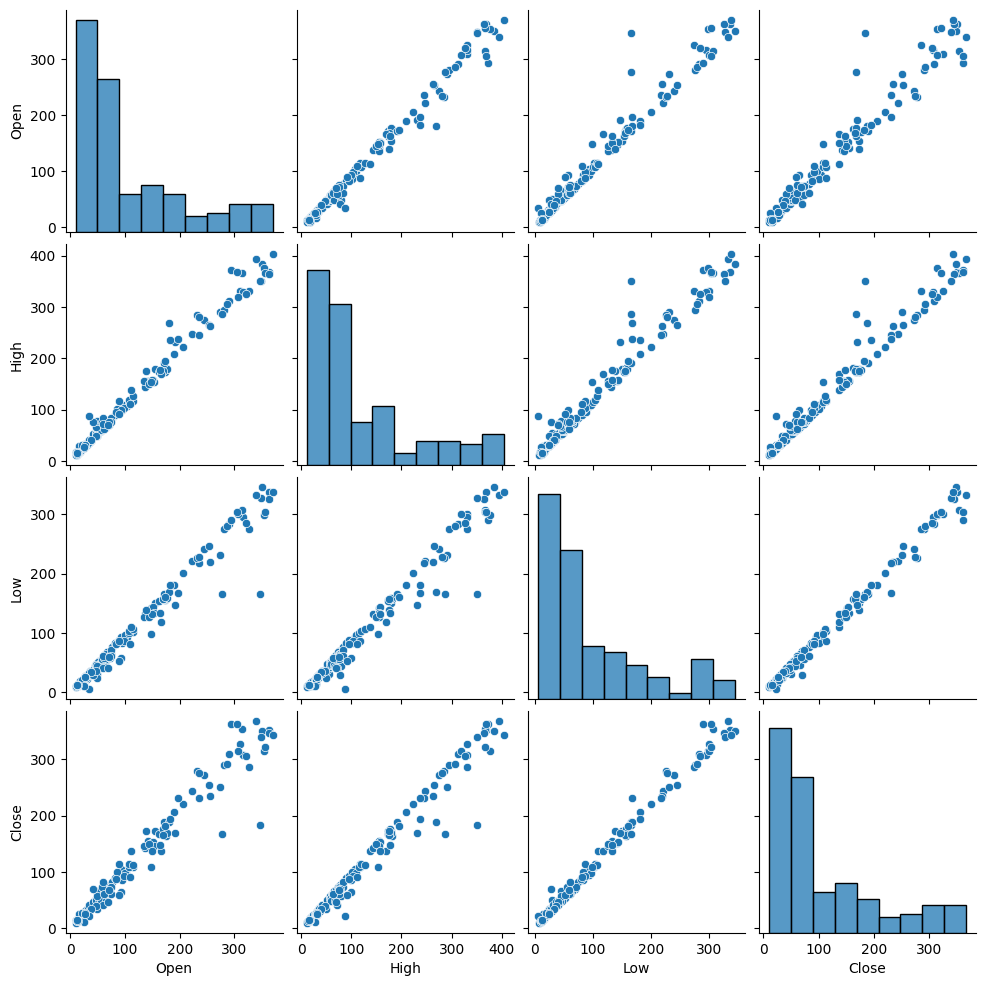

In [ ]:
# plotting the relationship between each pair of variables using pair plots.
sns.pairplot(df)

## ***6. Feature Engineering & Data Pre-processing***

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation


***Variance Inflation Factor(VIF): A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.***

In [ ]:
# Manipulating Features to minimize feature correlation using VIF analysis
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def cal_vif(X):

    vif = pd.DataFrame() 
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
cal_vif(df[[i for i in df.columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Checking VIF without Date and Open features
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
#Checking VIF without Date and High features
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [ ]:
#Checking VIF without Date and Low features
cal_vif(df[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


#### 2. Feature Selection


we have checked VIF with dropping each features(Open,High & Low) one by one,better result of VIF was when we dropped 'Open' which was also realtively high.

Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we can't drop any column.

As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model.

Hence we will not drop any column and will try to predict result and see how model is performing with multicollinearity.

### 3. Data Scaling & Data Splitting

In [ ]:
#splitting the data into independent and dependent variable
dependent_variable = 'Close'
independent_variables = list(set(df.columns) - {dependent_variable,'Date'}) #removing the Date column as it's of no use 

# Scaling your data
# applying zscore to each values of independent variable 

from scipy.stats import zscore  
X = round(df[independent_variables].apply(zscore),3)
y=np.log10(df[dependent_variable].values)

##### Which method have you used to scale your data and why?


Z-score normalization. It refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1

### 8. Data Splitting

In [ ]:
# splitting the data into a train and a test set using train test split.
# Keeping 20% of the data in test set and rest in train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.**

In [ ]:
# shape of train set and test set
print('Shape of x_train : ',X_train.shape)
print('Shape of x_test : ',X_test.shape)

Shape of x_train :  (148, 3)
Shape of x_test :  (37, 3)


##### What data splitting ratio have you used and why? 

We have used 80:20 split for training and testing. 

## ***7. ML Model Implementation***

### ML Model - Linear Regression

***Linear regression*** is a supervised learning algorithm that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

In [ ]:
# Initializing and fitting multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# train accuracy of linear regression model
regressor.score(X_train, y_train)


0.8091152094340809

In [ ]:
regressor.intercept_

1.8262495893435555

In [ ]:
regressor.coef_

array([-0.13270791,  0.29061643,  0.23265022])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# predicted values of y_test
y_pred

array([1.53276423, 1.96672923, 1.61039984, 1.95577646, 1.66713574,
       1.53291803, 2.3198133 , 1.47234925, 1.46174706, 2.27202742,
       2.59746859, 1.77196223, 2.0045669 , 1.63999469, 2.73573264,
       2.44754382, 1.69457789, 1.51594662, 2.45298264, 1.61176382,
       1.44547559, 1.87456785, 2.0156832 , 1.63781436, 2.25493358,
       1.63516541, 2.42563442, 1.46032674, 1.83171021, 1.62287589,
       2.8811247 , 2.77612524, 1.69605907, 2.0717636 , 1.56161009,
       1.59665024, 2.42253306])

In [ ]:
# actual values of y_test
np.array(y_test)

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

***Evaluation metrics*** are used to measure the quality of the statistical or machine learning model. There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:

* MSE(Mean Squared Error)
* RMSE(Root Mean Squared Error)
* MAE(Mean Absolute Error)
* MAPE(Mean Absolute Percentage Error)
* R2 score(R-Squared)
* Adjusted R2


In [ ]:
# Test Performance of linear regression model using evaluation metrics

MSE_lr  = mean_squared_error(y_test,y_pred)
print("MSE :" , round((MSE_lr),3))

RMSE_lr = np.sqrt(MSE_lr)
print("RMSE :" ,round((RMSE_lr),3))

MAE_lr = mean_absolute_error(y_test,y_pred)
print("MAE :" , round((MAE_lr),3))

MAPE_lr = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE :" , round((MAPE_lr),3))

r2_lr = r2_score(y_test,y_pred)
print("R2 :" ,round((r2_lr),3))

adjusted_r2_lr = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",round((adjusted_r2_lr),3))

MSE : 0.032
RMSE : 0.179
MAE : 0.146
MAPE : 0.087
R2 : 0.828
Adjusted R2 :  0.813


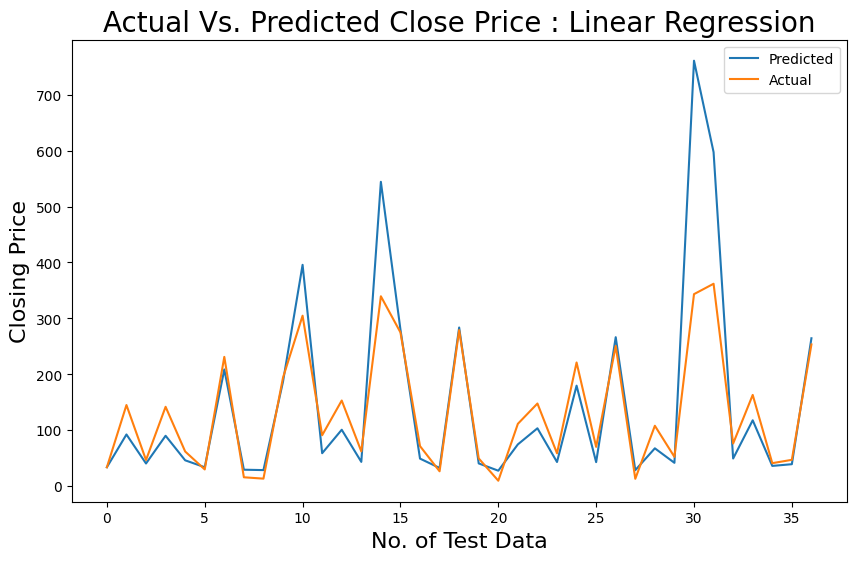

In [ ]:
# Plotting Actual Price vs. Predicted Price for Linear Regression 

plt.figure(figsize=(10,6))
plt.plot(10**y_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : Linear Regression',fontsize = 20)
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

### ML Model - Lasso Regression

***Lasso regression*** is a regularization technique. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. 
Lasso Regression uses L1 regularization technique, which adds a penalty equal to the absolute value of the magnitude of coefficients.



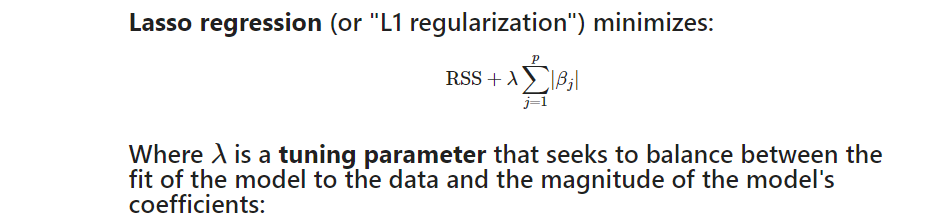

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing Lasso model.
from sklearn.linear_model import Lasso

# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

# Fitting the model on our training data.
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.8090939585511401

In [ ]:
lasso.coef_

array([-0.11436313,  0.27512755,  0.22962624])

In [ ]:
lasso.intercept_

1.8261987312585406

In [ ]:
# Predictint the test set results
y_lasso_pred=lasso.predict(X_test)

# predicted values of y_test
y_lasso_pred

array([1.53332766, 1.96860702, 1.61220737, 1.95629196, 1.66658655,
       1.53256994, 2.32100601, 1.47267468, 1.46215897, 2.26594322,
       2.60050438, 1.77390741, 2.00535034, 1.64057348, 2.73888133,
       2.44292631, 1.69483186, 1.51597748, 2.44751778, 1.61220691,
       1.44585203, 1.87423512, 2.01606982, 1.63754408, 2.25450764,
       1.63125174, 2.42685633, 1.46078243, 1.83225773, 1.62409759,
       2.88012378, 2.76706249, 1.69530866, 2.07291586, 1.56172443,
       1.59719282, 2.42314342])

In [ ]:
# Test performance of Lasso Regression Using evaluation metrics

print("MSE :", round((mean_squared_error(y_test,y_lasso_pred)),3))
print("RMSE :" ,round((np.sqrt(mean_squared_error(y_test,y_lasso_pred))),3))
print("MAE :" , round((mean_absolute_error(y_test,y_lasso_pred)),3))
print("MAPE :" , round((mean_absolute_percentage_error(y_test, y_lasso_pred)),3))
print("R2 :" ,round((r2_score(y_test,y_lasso_pred)),3))
print("Adjusted R2 : ",round((1-(1-r2_score(y_test, y_lasso_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3))


MSE : 0.032
RMSE : 0.179
MAE : 0.145
MAPE : 0.087
R2 : 0.829
Adjusted R2 :  0.904


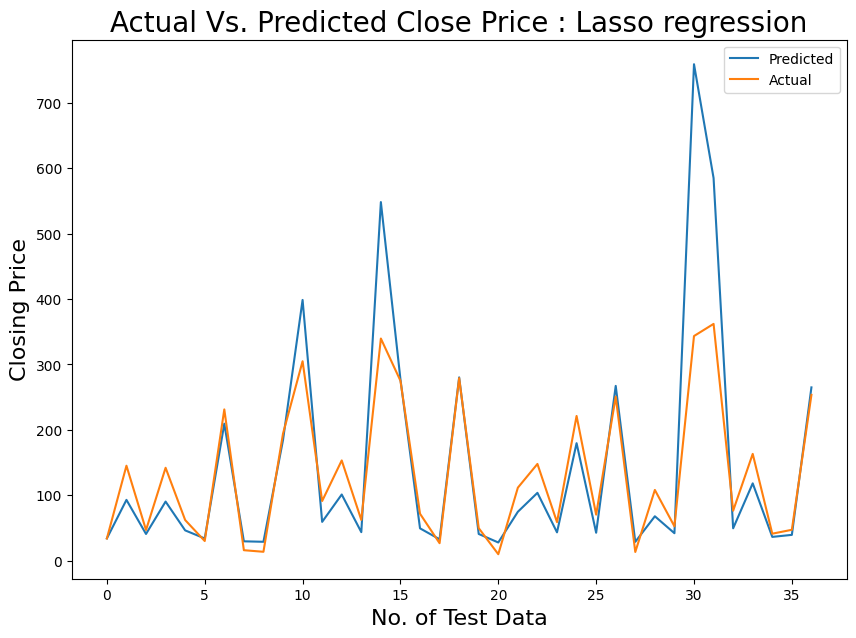

In [ ]:
#Plotting Actual vs Predicted for Lasso Regression

plt.figure(figsize=(10,7))
plt.plot(10**y_lasso_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : Lasso regression',fontsize = 20)
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

## **Cross-Validation**

**Cross validation (CV)** is one of the technique used to test the effectiveness of a machine learning models by dividing data into two segments: one used to learn or train a model and the other used to validate the model.If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

In [ ]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.

from sklearn.model_selection import GridSearchCV
lasso = Lasso()

# Hyperparameter Tuning
lasso_parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}  
lasso_cv = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# checking the best parameter and best score

print("The best fit alpha value is found out to be :" ,lasso_cv.best_params_)
print("\nUsing ",lasso_cv.best_params_, " the negative mean squared error is: ", lasso_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.035372523394138836


In [ ]:
# Predict on the test 

y_lasso_cv_pred=lasso_cv.predict(X_test)
y_lasso_cv_pred

array([1.54354506, 1.97567483, 1.62805092, 1.95536159, 1.66663128,
       1.53726973, 2.3148782 , 1.48298087, 1.47326044, 2.2171556 ,
       2.59844548, 1.7864254 , 2.00479671, 1.64813235, 2.73387258,
       2.39848578, 1.69901958, 1.52339331, 2.39783613, 1.61968195,
       1.45716442, 1.87029822, 2.01296535, 1.64002108, 2.24023707,
       1.61193345, 2.41832362, 1.47218329, 1.83472194, 1.6360092 ,
       2.84646739, 2.68741293, 1.69340723, 2.07291409, 1.56848062,
       1.60563979, 2.41082202])

In [ ]:
# checking the performance for Lasso Regression after cross-validation using evaluation metrics.
MSE_l =  round(mean_squared_error(y_test,y_lasso_cv_pred),3)
print("MSE_l :" ,MSE_l)

RMSE_l = round(np.sqrt(MSE_l),3)
print("RMSE_l :" ,RMSE_l)

MAE_l = round(mean_absolute_error(y_test,y_lasso_cv_pred),3)
print("MAE_l :" ,MAE_l)

MAPE_l = mean_absolute_percentage_error(y_test, y_lasso_cv_pred)
print("MAPE :" , round((MAPE_l),3))

R2_l = round(r2_score(y_test,y_lasso_cv_pred),3)
print("R2_l :" ,R2_l)

Adjusted_R2_l = round(1-(1-r2_score(y_test, y_lasso_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted_R2_l : ", Adjusted_R2_l)

MSE_l : 0.032
RMSE_l : 0.179
MAE_l : 0.146
MAPE : 0.088
R2_l : 0.831
Adjusted_R2_l :  0.815


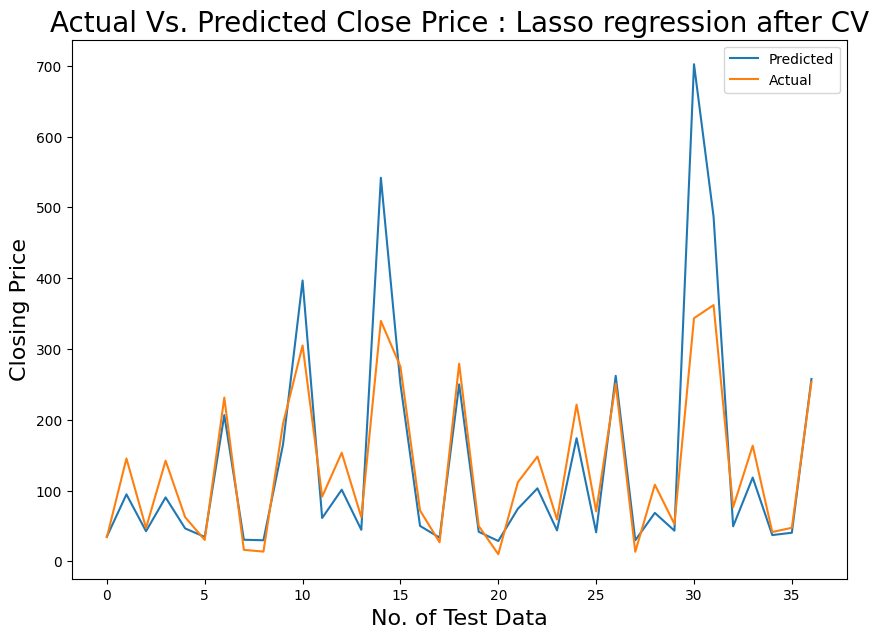

In [ ]:
# Plotting Actual vs Predicted for Lasso Regression after Cross-Validation
plt.figure(figsize=(10,7))
plt.plot(10**y_lasso_cv_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : Lasso regression after CV',fontsize = 20) #Cross-Validation
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We've used ***GridSearchCV***. It is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Evaluation metrics have slightly improved after Cross-Validation 

### ML Model - Ridge Regression

***Ridge regression*** is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.


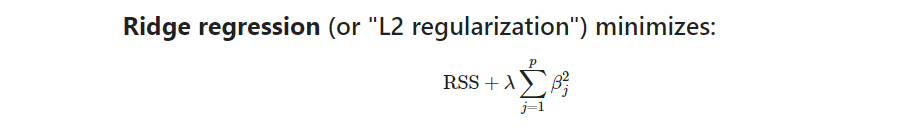

where alpha is a tuning parameter.

In [ ]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge

# initializing the model with some base values
ridge=Ridge(alpha=0.1)

# fitting the moodel on train data
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# train accuracy of Ridge Regression
round(ridge.score(X_train,y_train),3)

0.809

In [ ]:
# Predicting the test set results by Ridge Regression

y_ridge_pred=ridge.predict(X_test)
y_ridge_pred

array([1.53352283, 1.96910415, 1.61255121, 1.95652033, 1.66650856,
       1.532539  , 2.32135073, 1.47284457, 1.46234918, 2.2642429 ,
       2.60125072, 1.77432264, 2.00563526, 1.64078218, 2.73982133,
       2.44164363, 1.69497549, 1.51606007, 2.44598236, 1.61235674,
       1.44601757, 1.87417277, 2.01601499, 1.63754549, 2.25447469,
       1.63003422, 2.42697704, 1.46098673, 1.83245141, 1.62441996,
       2.87971761, 2.76450779, 1.69515965, 2.07321729, 1.56181912,
       1.59739773, 2.42341647])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# checking the performance for Ridge Regression

print("MSE :" ,round(mean_squared_error(y_test,y_ridge_pred),3))

print("RMSE :" ,round((np.sqrt(mean_squared_error(y_test,y_ridge_pred))),3))

print("MAE :" ,round(mean_absolute_error(y_test,y_ridge_pred),3))

print("MAPE :" ,round(mean_absolute_percentage_error(y_test, y_ridge_pred),3))

print("R2 :" ,round(r2_score(y_test,y_ridge_pred),3))

print("Adjusted R2 :" ,round(1-(1-r2_score(y_test, y_ridge_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3))

MSE : 0.032
RMSE : 0.179
MAE : 0.145
MAPE : 0.087
R2 : 0.829
Adjusted R2 : 0.813


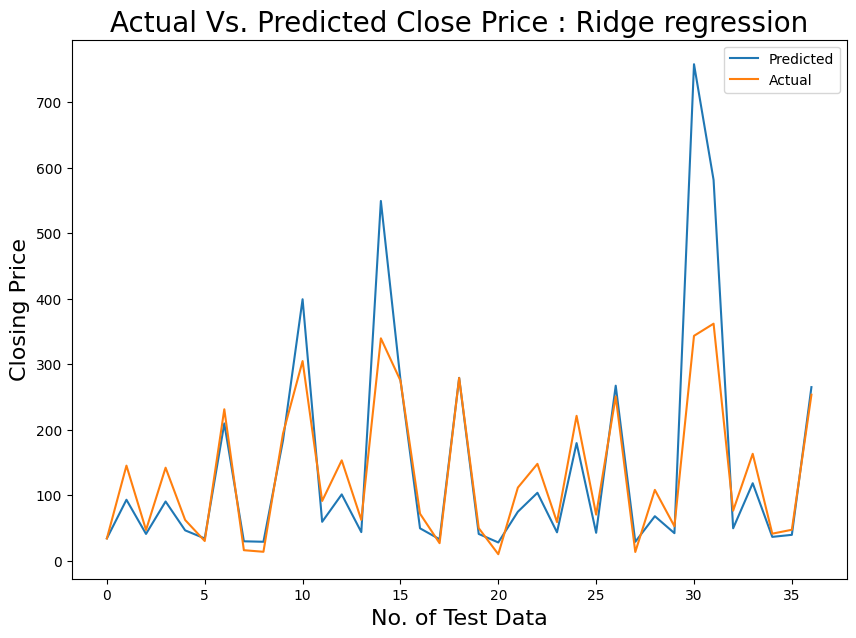

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression

plt.figure(figsize=(10,7))
plt.plot(10**y_ridge_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : Ridge regression',fontsize = 20) #Cross-Validation
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#CrossValidation 
#Hyperparameter Tunning
ridge = Ridge()
ridge_parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_cv = GridSearchCV(ridge, ridge_parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# best parameter and best score

print("The best fit alpha value is found out to be :",ridge_cv.best_params_)
print("\nUsing ",ridge_cv.best_params_, " the negative mean squared error is: ", ridge_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03558908264931504


In [ ]:
#Predicting y_test after CV
y_ridge_cv_pred = ridge_cv.predict(X_test)
y_ridge_cv_pred

array([1.53694649, 1.97880904, 1.62345152, 1.95842907, 1.66350981,
       1.53097617, 2.32637033, 1.47492997, 1.46493911, 2.23085678,
       2.61598601, 1.78539004, 2.0089461 , 1.64398148, 2.75395632,
       2.41557251, 1.69618453, 1.51650618, 2.4154911 , 1.61501631,
       1.44853734, 1.87206598, 2.0184214 , 1.63608772, 2.2506674 ,
       1.61034145, 2.43314212, 1.46380222, 1.83506034, 1.63142241,
       2.87250347, 2.71424245, 1.69110404, 2.07878676, 1.56265882,
       1.60047479, 2.42461498])

In [ ]:
# checking the performance for Ridge Regression after Cross-Validation

MSE_r = round((mean_squared_error(y_test,y_ridge_cv_pred)),3)
print("MSE_r :" ,MSE_r)
      
RMSE_r = round((np.sqrt(MSE_r)),3)
print("RMSE_r :" ,RMSE_r)

MAE_r = round((mean_absolute_error(y_test,y_ridge_cv_pred)),3)
print("MAE_r :" ,MAE_r)

MAPE_r = round((mean_absolute_percentage_error(y_test, y_ridge_cv_pred)),3)
print("MAPE_r :", MAPE_r)

R2_r = round((r2_score(y_test,y_ridge_cv_pred)),3)
print("R2_r :" ,R2_r)

Adjusted_R2_r = round(1-(1-r2_score(y_test, y_ridge_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2_r :" ,Adjusted_R2_r)

MSE_r : 0.032
RMSE_r : 0.179
MAE_r : 0.146
MAPE_r : 0.087
R2_r : 0.83
Adjusted R2_r : 0.814


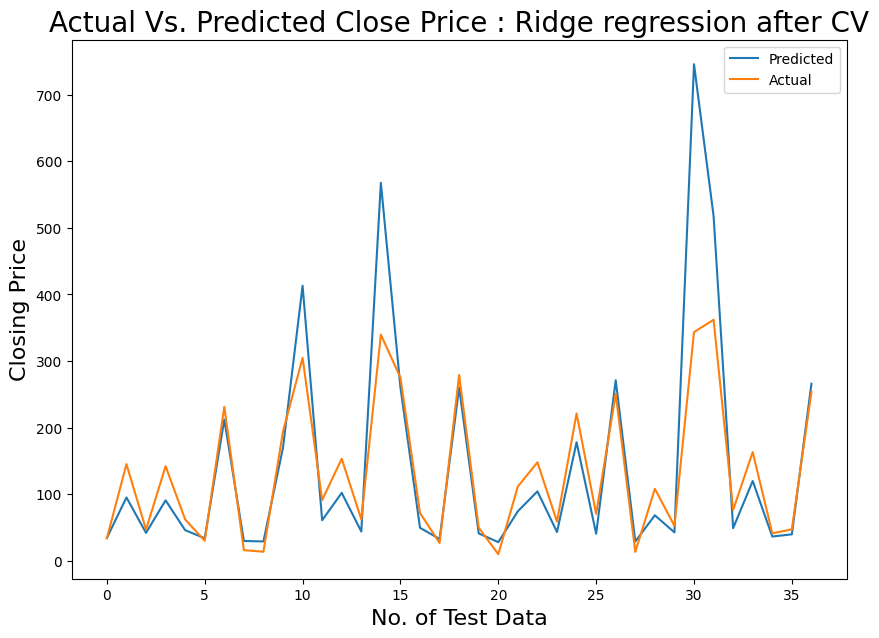

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression after Cross-Validation

plt.figure(figsize=(10,7))
plt.plot(10**y_ridge_cv_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : Ridge regression after CV',fontsize = 20) #Cross-Validation
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We've used ***GridSearchCV***.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics have improved slightly.

# ML MODEL 4. ELASTIC NET REGRESSION

***Elastic net linear regression*** uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [ ]:
#Implementing Elastic Net Regression
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

from sklearn.linear_model import ElasticNet
elasticNet_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticNet_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Checking training accuracy of ElasticNet Regression
round(elasticNet_reg.score(X_train,y_train),2)

0.79

In [ ]:
# Predicting test set results

y_elasticNet_pred = elasticNet_reg.predict(X_test)
y_elasticNet_pred

array([1.57832108, 1.95870989, 1.66255952, 1.93289008, 1.68010733,
       1.569086  , 2.24879016, 1.52366241, 1.51565221, 2.14270369,
       2.50396463, 1.79883378, 1.97716104, 1.66854841, 2.61553382,
       2.30378079, 1.71066446, 1.55793634, 2.30125369, 1.64428871,
       1.50215862, 1.85869214, 1.9914854 , 1.65786218, 2.17655176,
       1.62998502, 2.34698383, 1.51478327, 1.83018265, 1.66243009,
       2.70736848, 2.54155482, 1.70322159, 2.04042561, 1.59762621,
       1.6314278 , 2.32671311])

In [ ]:
# checking the performance for ElasticNet Regression

print("MSE :" ,round((mean_squared_error(y_test,y_elasticNet_pred)),3))

print("RMSE :" ,round((np.sqrt(mean_squared_error(y_test,y_elasticNet_pred))),3))

print("MAE :" ,round((mean_absolute_error(y_test,y_elasticNet_pred)),3))

print("MAPE :", round((mean_absolute_percentage_error(y_test, y_elasticNet_pred)),3))

print("R2 :" ,round((r2_score(y_test,y_elasticNet_pred)),3))

print("Adjusted R2 :" ,round((1-(1-r2_score(y_test, y_elasticNet_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),3))

MSE : 0.034
RMSE : 0.185
MAE : 0.151
MAPE : 0.092
R2 : 0.816
Adjusted R2 : 0.799


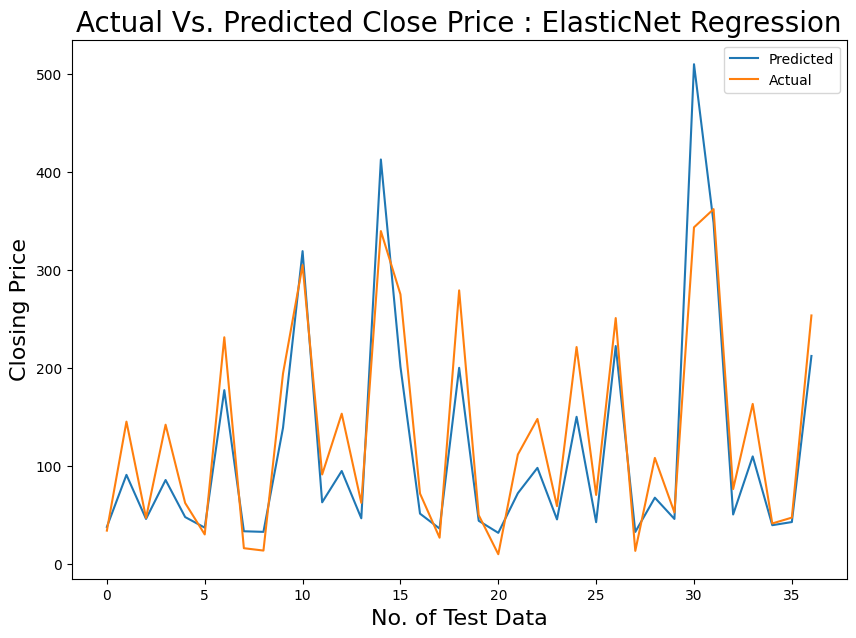

In [ ]:
# Plotting Actual vs Predicted for ElasticNet Regression

plt.figure(figsize=(10,7))
plt.plot(10**y_elasticNet_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : ElasticNet Regression',fontsize = 20) #Cross-Validation
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Implementing CV
elastic=ElasticNet()
elasticNet_parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elasticNet_cv = GridSearchCV(elastic,elasticNet_parameters,scoring='neg_mean_squared_error',cv=5)
elasticNet_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elasticNet_cv.best_params_)
print("\nUsing ",elasticNet_cv.best_params_, " the negative mean squared error is: ", elasticNet_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.03517529417122726


In [ ]:
# Predicting test set results for ElasticNet After Cross-Validation
y_elasticNet_cv_pred=elasticNet_cv.predict(X_test)
y_elasticNet_cv_pred

array([1.53992113, 1.97782398, 1.62630899, 1.9569094 , 1.66460487,
       1.5335637 , 2.32138238, 1.47840045, 1.46855832, 2.22354503,
       2.60893086, 1.78657575, 2.00703968, 1.64583028, 2.74532704,
       2.40698754, 1.69730843, 1.51941094, 2.40653584, 1.61712978,
       1.45232858, 1.87112223, 2.01648591, 1.63759675, 2.24564858,
       1.61067051, 2.42730363, 1.46745139, 1.8348975 , 1.63377067,
       2.86093279, 2.70051829, 1.69183366, 2.07641243, 1.56513015,
       1.60275635, 2.41822894])

In [ ]:
# checking the performance for ElasticNet Regression after Cross-Validation

MSE_EN = round((mean_squared_error(y_test,y_elasticNet_cv_pred)),3)
print("MSE_EN :" ,MSE_EN)

RMSE_EN = round((np.sqrt(MSE_EN)),4)
print("RMSE_EN :" ,RMSE_EN)

MAE_EN = round((mean_absolute_error(y_test,y_elasticNet_cv_pred)),3)
print("MAE_EN :" ,MAE_EN)

MAPE_EN = round((mean_absolute_percentage_error(y_test, y_elasticNet_cv_pred)),3)
print("MAPE_EN :" ,MAPE_EN)

R2_EN = round((r2_score(y_test,y_elasticNet_cv_pred)),3)
print("R2_EN :" ,R2_EN)

Adjusted_R2_EN = round((1-(1-r2_score(y_test, y_elasticNet_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),3)
print("Adjusted_R2_EN :" ,Adjusted_R2_EN)

MSE_EN : 0.032
RMSE_EN : 0.1789
MAE_EN : 0.146
MAPE_EN : 0.088
R2_EN : 0.83
Adjusted_R2_EN : 0.815


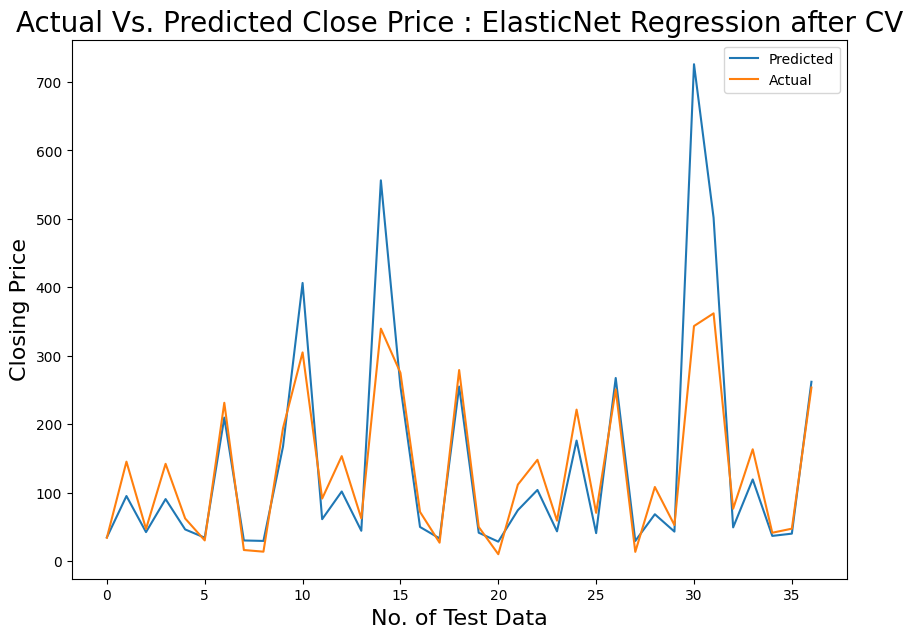

In [ ]:
# Plotting Actual vs Predicted for ElasticNet Regression after Cross-Validation

plt.figure(figsize=(10,7))
plt.plot(10**y_elasticNet_cv_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : ElasticNet Regression after CV',fontsize = 20) #Cross-Validation
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

# ML MODEL 4 - XG Boost Regression

***XGBoost*** stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
#Implementing XG Boost Regression.
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Checking the training accuracy of XGBoost Regression
xgb.score(X_train,y_train)

0.9999840421398938

In [ ]:
#Predicting y_test using XGBoost
y_xgb_pred=xgb.predict(X_test)
y_xgb_pred

array([1.5140086, 2.1616907, 1.6303504, 2.1699212, 1.854547 , 1.4724619,
       2.3859963, 1.2417192, 1.1185629, 2.305692 , 2.4866602, 1.9882841,
       2.1600556, 1.770456 , 2.515046 , 2.3727667, 1.8563399, 1.4469036,
       2.3727667, 1.7097392, 1.0254743, 2.1525347, 2.2216482, 1.7570033,
       2.3998606, 1.5944484, 2.4353044, 1.1043894, 2.0385973, 1.7450418,
       2.5441566, 2.5187569, 1.8637791, 2.2324796, 1.5881077, 1.7584056,
       2.4341013], dtype=float32)

In [ ]:
# checking the performance for XGBoost Regression using evaluation metrics

MSE_xgb = round((mean_squared_error(y_test,y_xgb_pred)),3)
print("MSE_xgb :" ,MSE_xgb)

RMSE_xgb = round((np.sqrt(MSE_xgb)),4)
print("RMSE_xgb :" ,RMSE_xgb)

MAE_xgb = round((mean_absolute_error(y_test,y_xgb_pred)),3)
print("MAE_xgb :" ,MAE_xgb)

MAPE_xgb = round((mean_absolute_percentage_error(y_test, y_xgb_pred)),3)
print("MAPE_xgb :" ,MAPE_EN)

R2_xgb = round((r2_score(y_test,y_xgb_pred)),3)
print("R2_xgb :" ,R2_xgb)

Adjusted_R2_xgb = round((1-(1-r2_score(y_test, y_xgb_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),3)
print("Adjusted_R2_xgb :" ,Adjusted_R2_xgb)

MSE_xgb : 0.003
RMSE_xgb : 0.0548
MAE_xgb : 0.036
MAPE_xgb : 0.088
R2_xgb : 0.983
Adjusted_R2_xgb : 0.982


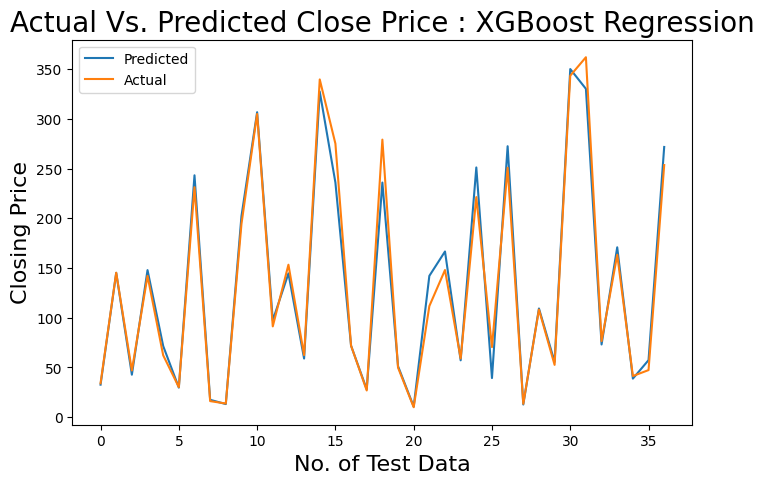

In [ ]:
#Plotting Actual vs Predicted for XGBoost Regression
plt.figure(figsize=(8,5))
plt.plot(10**y_xgb_pred)  
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual Vs. Predicted Close Price : XGBoost Regression',fontsize = 20)
plt.xlabel('No. of Test Data',fontsize = 16)
plt.ylabel('Closing Price',fontsize = 16)
plt.show()

###**Evaluation Metric score chart**

**Comparing Model's on the basis of Evaluation Metrics**

In [ ]:
# create dataframe with every model's evaluation metrics

# for lasso,ridge and elasticnet, i've taken evaluation metrics values after Cross-Validation

model_metrics_df = pd.DataFrame(data={'model':['linear regression','lasso regression','ridge regression','elasticNet regression','XGBoost Regression'], 'MSE':[MSE_lr,MSE_l,MSE_r,MSE_EN,MSE_xgb], 'RMSE':[RMSE_lr,RMSE_l,RMSE_r,RMSE_EN,RMSE_xgb], 'MAE':[MAE_lr,MAE_l,MAE_r,MAE_EN,MAE_xgb],'MAPE':[MAPE_lr,MAPE_l,MAPE_r,MAPE_EN,MAPE_xgb],'r2_score':[r2_lr,R2_l,R2_r,R2_EN,R2_xgb],'adjusted_r2_score':[adjusted_r2_lr,Adjusted_R2_l,Adjusted_R2_r,Adjusted_R2_EN,Adjusted_R2_xgb]})
model_metrics_df 

,model,MSE,RMSE,MAE,MAPE,r2_score,adjusted_r2_score
0,linear regression,0.031981,0.178831,0.145688,0.087039,0.828322,0.812715
1,lasso regression,0.032000,0.179000,0.146000,0.087733,0.831000,0.815000
2,ridge regression,0.032000,0.179000,0.146000,0.087000,0.830000,0.814000
3,elasticNet regression,0.032000,0.178900,0.146000,0.088000,0.830000,0.815000
4,XGBoost Regression,0.003000,0.054800,0.036000,0.019000,0.983000,0.982000


###  Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost Regression. It's clearly visible that the best performing model is XGBoost as it scores the best in every single metric.

# **Conclusion**

* The impact of fraud case involving Rana Kapoor on stock prices is clearly visible. The Yes Bank stock prices were going up till 2018 but after 2018 the downfall is evident.
* There are no null values nor any duplicate values in our dataset.
* There are some outliers in our features but the dataset is  very small, dropping any one of instances will result in loss of important data which are essential for accurate model prediction.
* All the variables are positively skewed. Therefore performed log transformation to reduce the skewness and convert it to the distribution close to normal.
* All the independent variables(Open,High,Low) are highly correlated with dependent variable(Close).
*  There is a high correlation between independent variables also which results in Multicollinearity.

* I implemented several models(***Linear Regression,Lasso Regression, Ridge Regression, Elastic Net Regression and XGBoost Regression***) on the dataset in order to be able to predict the closing price.
* ***RMSE*** and ***MAPE*** are mostly used as evaluatuion metrics and are the measures of prediction accuracy of a forecasting method.
* XGBoost Regression came out to be the best model among all the five models with lowest RMSE=0.0548, and MAPE=0.01900 and also it has highest r2 score(r2 score=0.9820).

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***